# Analysis on World suicide rate in the year 1987 to 2016

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
df = pd.read_csv(r"C:\Users\HPUSER\Documents\datasets\datasets\master.csv")

In [63]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Renaming the Column names

In [64]:
df.rename(columns = {"suicides/100k pop":"suicides_pop", "HDI for year":"HDI_for_year",' gdp_for_year ($) ': 'gdp_for_year' , "gdp_per_capita ($)":"GDP_per_capital"},inplace = True)

In [7]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,HDI_for_year,gdp_for_year,GDP_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Removing the (country-year) column, because it was splited in the dataset already

In [8]:
df=df.drop(['country-year', 'HDI_for_year', 'gdp_for_year'], axis=1)

In [9]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_pop,GDP_per_capital,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [10]:
 df.describe()

,year,suicides_no,population,suicides_pop,GDP_per_capital
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [11]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,27820,101,Mauritius,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,27820.0,NaN,NaN,NaN,2001.258375,8.469055,1985.0,1995.0,2002.0,2008.0,2016.0
sex,27820,2,male,13910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,27820,6,15-24 years,4642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
suicides_no,27820.0,NaN,NaN,NaN,242.574407,902.047917,0.0,3.0,25.0,131.0,22338.0
population,27820.0,NaN,NaN,NaN,1844793.617398,3911779.441756,278.0,97498.5,430150.0,1486143.25,43805214.0
suicides_pop,27820.0,NaN,NaN,NaN,12.816097,18.961511,0.0,0.92,5.99,16.62,224.97
GDP_per_capital,27820.0,NaN,NaN,NaN,16866.464414,18887.576472,251.0,3447.0,9372.0,24874.0,126352.0
generation,27820,6,Generation X,6408,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(27820, 9)

In [13]:
df.size

250380

In [14]:
df.dtypes

country             object
year                 int64
sex                 object
age                 object
suicides_no          int64
population           int64
suicides_pop       float64
GDP_per_capital      int64
generation          object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27820 non-null  object 
 1   year             27820 non-null  int64  
 2   sex              27820 non-null  object 
 3   age              27820 non-null  object 
 4   suicides_no      27820 non-null  int64  
 5   population       27820 non-null  int64  
 6   suicides_pop     27820 non-null  float64
 7   GDP_per_capital  27820 non-null  int64  
 8   generation       27820 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 1.9+ MB


In [16]:
len("country")

7

knowing the unique values of some coloumns

In [17]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [18]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [20]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [21]:
df['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

knowing the no of unique value in country

In [22]:
df['country'].nunique()

101

In [23]:
df.duplicated().sum()

0

checking for Null value

In [24]:
df.isnull().sum()

country            0
year               0
sex                0
age                0
suicides_no        0
population         0
suicides_pop       0
GDP_per_capital    0
generation         0
dtype: int64

In [26]:
df['suicides_no'].sum()

6748420

In [27]:
df.groupby(['year']).sum()

,suicides_no,population,suicides_pop,GDP_per_capital
year,,,,
1985,116063,1008600086,6811.89,3508548
1986,120670,1029909613,6579.84,4104636
1987,126842,1095029726,7545.45,5645760
1988,121026,1054094424,7473.13,5870508
1989,160244,1225514347,8036.54,6068424
1990,193361,1466620100,9878.75,7531260
1991,198020,1489988384,10321.06,7782096
1992,211473,1569539447,10528.88,8195232
1993,221565,1530416654,10790.29,8231796


grouping by country 

In [28]:
df.groupby("country").sum()

,year,suicides_no,population,suicides_pop,GDP_per_capital
country,,,,,
Albania,527796,1970,62325467,924.76,490788
Antigua and Barbuda,647832,11,1990228,179.14,3385212
Argentina,744000,82219,1035985431,3894.59,2944044
Armenia,596832,1905,77348173,976.21,558428
Aruba,336720,101,1259677,1596.52,4069236
...,...,...,...,...,...
United Arab Emirates,144540,622,36502275,94.89,3035664
United Kingdom,744000,136805,1738767780,2790.92,11869908
United States,744000,1034013,8054027201,5140.97,14608296


In [29]:
grouped = df.groupby('sex')
print(grouped['population'].agg(np.mean))
print ("\n")

sex
female    1.888769e+06
male      1.800818e+06
Name: population, dtype: float64




### checking for outliers

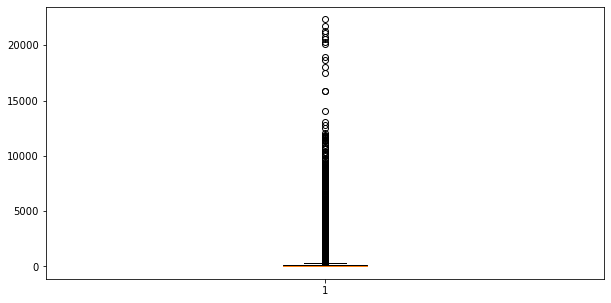

In [27]:
plt.figure(figsize =( 10,5))
plt.boxplot(df["suicides_no"])
plt.show()

In [28]:
q1 = df['suicides_no'].quantile(0.25)
q3 = df['suicides_no'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'suicides_no'] > toprange:
        df.loc[i, 'suicides_no'] = toprange
    if df.loc[i, 'suicides_no'] < botrange:
        df.loc[i, 'suicides_no'] = botrange

Text(0.5, 1.0, 'Cleaning values')

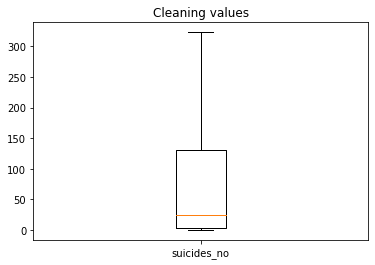

In [29]:
plt.boxplot(df['suicides_no'], labels=['suicides_no'])
plt.title('Cleaning values')

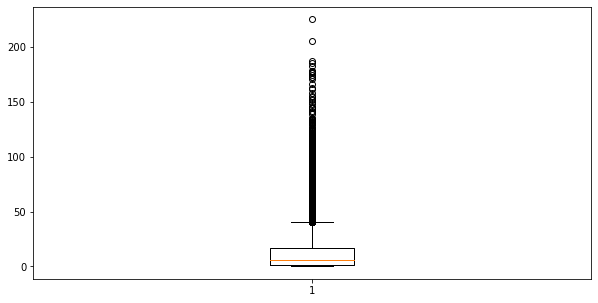

In [30]:
plt.figure(figsize =( 10,5))
plt.boxplot(df["suicides_pop"])
plt.show()

In [31]:
q1 = df['suicides_pop'].quantile(0.25)
q3 = df['suicides_pop'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'suicides_pop'] > toprange:
        df.loc[i, 'suicides_pop'] = toprange
    if df.loc[i, 'suicides_pop'] < botrange:
        df.loc[i, 'suicides_pop'] = botrange

Text(0.5, 1.0, 'Cleaning values')

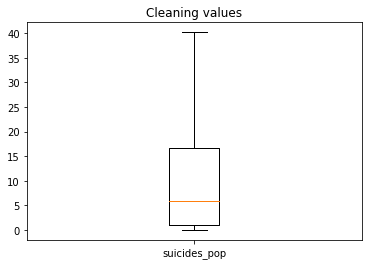

In [32]:
plt.boxplot(df['suicides_pop'], labels=['suicides_pop'])
plt.title('Cleaning values')

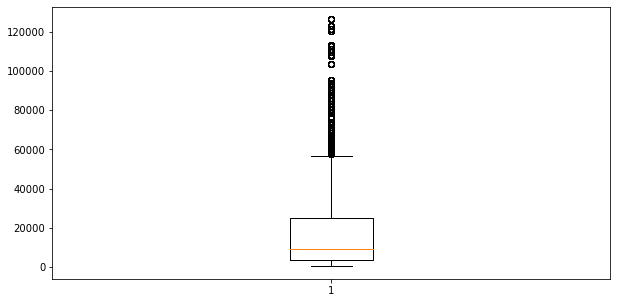

In [33]:
plt.figure(figsize =( 10,5))
plt.boxplot(df["GDP_per_capital"])
plt.show()

In [34]:
q1 = df['GDP_per_capital'].quantile(0.25)
q3 = df['GDP_per_capital'].quantile(0.75)
iqr = q3 - q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5
for i in df.index:
    if df.loc[i, 'GDP_per_capital'] > toprange:
        df.loc[i, 'GDP_per_capital'] = toprange
    if df.loc[i, 'GDP_per_capital'] < botrange:
        df.loc[i, 'GDP_per_capital'] = botrange

Text(0.5, 1.0, 'Cleaning values')

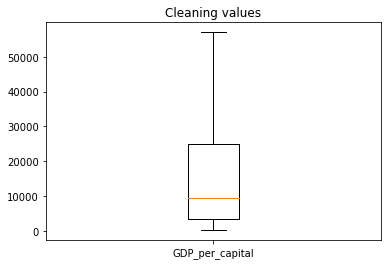

In [35]:
plt.boxplot(df['GDP_per_capital'], labels=['GDP_per_capital'])
plt.title('Cleaning values')

# Data visualization

maximum and minimum number of suicide

In [36]:
df.groupby("country")["suicides_no"].count().max()

382

In [37]:
df.groupby("country")["suicides_no"].count().min()

10

## What country has the highest number of suicides
(Grouping by country and suicide_no)

This is showing us the max number for each country

In [31]:
dfcs = df.groupby("country").sum()
dfcs.sort_values("suicides_no", ascending=False , 
inplace = True)
dfcs.head(10)

,year,suicides_no,population,suicides_pop,GDP_per_capital
country,,,,,
Russian Federation,648648,1209742,3690802620,11305.13,2112096
United States,744000,1034013,8054027201,5140.97,14608296
Japan,744000,806902,3681024844,8025.23,13539888
France,719820,329127,1670756775,7803.25,11333328
Ukraine,672192,319950,1286469184,8931.66,627492
Germany,624780,291262,2024875612,4854.69,10971240
Republic of Korea,744000,261730,1354944936,9350.45,5506068
Brazil,744000,226613,4856093548,2174.72,2266032
Poland,576840,139098,866180029,4397.62,2346180


<AxesSubplot:title={'center':'country with the highest number of suicides \n 1985-2016 '}, xlabel='country'>

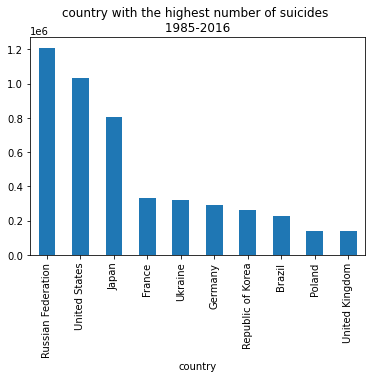

In [32]:
dfcs["suicides_no"].head(10).plot.bar(title= "country with the highest number of suicides \n 1985-2016 ", )


## In what year was the suicide no high (Grouping by year and suicides)

In [35]:
dfys = df.groupby("year").sum()
dfys.sort_values("suicides_no", ascending=False , 
inplace = True)
dfys.head(10)

,suicides_no,population,suicides_pop,GDP_per_capital
year,,,,
1999,256119,1776363155,14473.91,12780864
2002,256095,1822152815,14227.72,13017420
2003,256079,1838458020,13627.58,15187104
2000,255832,1799227908,14387.45,12865476
2001,250652,1755565489,14276.21,12677892
1998,249591,1725181351,14150.72,11506728
1996,246725,1662267662,14142.21,11600736
1995,243544,1591559103,14660.26,11858508
2009,243487,1976228366,12176.04,24145248


<AxesSubplot:title={'center':'year with the highest number of suicides \n 1985-2016 '}, xlabel='year'>

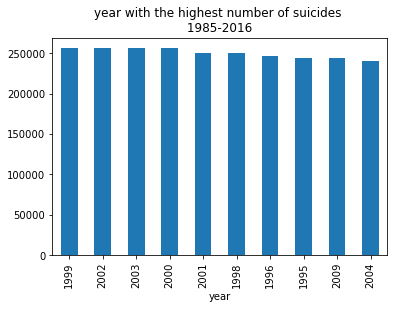

In [40]:
dfys["suicides_no"].head(10).plot.bar(title= "year with the highest number of suicides \n 1985-2016 ")


## What age has the highest number of suicide (Grouping by age and suicides_no)

In [42]:
dfAs = df.groupby("age").sum()
dfAs.sort_values("suicides_no", ascending=False , 
inplace = True)
dfAs.head(10)

,year,suicides_no,population,suicides_pop,GDP_per_capital
age,,,,,
35-54 years,9289920,2452141,14375888123,69386.02,78341054
55-74 years,9289920,1658443,8803245340,74994.20,78341054
25-34 years,9289920,1123912,8438103587,56571.52,78341054
15-24 years,9289920,808542,8642946896,41532.69,78341054
75+ years,9289920,653118,2663281253,111201.01,78341054
5-14 years,9225408,52264,8398693237,2858.39,77519770


<AxesSubplot:title={'center':'year with the highest number of suicides \n 1985-2016 '}, xlabel='age'>

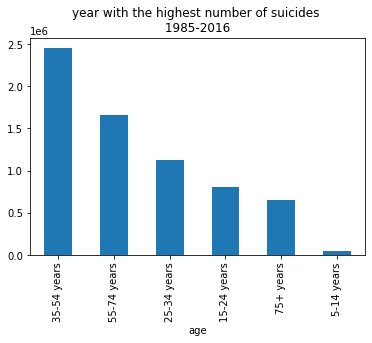

In [44]:
dfAs["suicides_no"].head(10).plot.bar(title= "year with the highest number of suicides \n 1985-2016 ")


## Country with the highest number of population(Grouping by country and ppulation)

In [45]:
dfcp= df.groupby("country").sum()
dfcp.sort_values("population", ascending=False , 
inplace = True)
dfcp.head(10)

,year,suicides_no,population,suicides_pop,GDP_per_capital
country,,,,,
United States,744000,1034013,8054027201,5140.97,14608296
Brazil,744000,226613,4856093548,2174.72,2266032
Russian Federation,648648,1209742,3690802620,11305.13,2112096
Japan,744000,806902,3681024844,8025.23,13539888
Mexico,744000,111139,2772959159,1751.19,2655504
Germany,624780,291262,2024875612,4854.69,10971240
United Kingdom,744000,136805,1738767780,2790.92,11869908
Italy,744000,132060,1715043704,3168.87,9896160
France,719820,329127,1670756775,7803.25,11333328


<AxesSubplot:title={'center':'country with the highest number of population \n 1985-2016 '}, xlabel='country'>

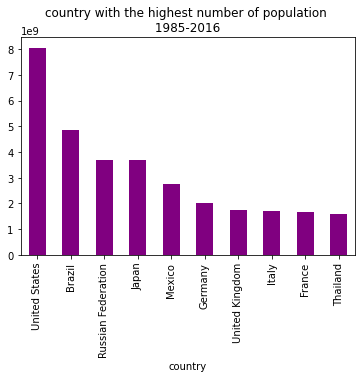

In [46]:
dfcp["population"].head(10).plot.bar(color = "purple",title= "country with the highest number of population \n 1985-2016 ")


## In what year was the highest no of suicide_pop (group by year and suicide_pop)

In [47]:
dfypp= df.groupby("year").sum()
dfypp.sort_values("suicides_pop", ascending=False , 
inplace = True)
dfypp.head(10)

,suicides_no,population,suicides_pop,GDP_per_capital
year,,,,
1995,243544,1591559103,14660.26,11858508
1999,256119,1776363155,14473.91,12780864
2000,255832,1799227908,14387.45,12865476
2001,250652,1755565489,14276.21,12677892
2002,256095,1822152815,14227.72,13017420
1998,249591,1725181351,14150.72,11506728
1996,246725,1662267662,14142.21,11600736
1997,240745,1702991519,13817.83,11398596
2003,256079,1838458020,13627.58,15187104


<AxesSubplot:title={'center':'year with the highest number of suicides_pop \n 1985-2016 '}, xlabel='year'>

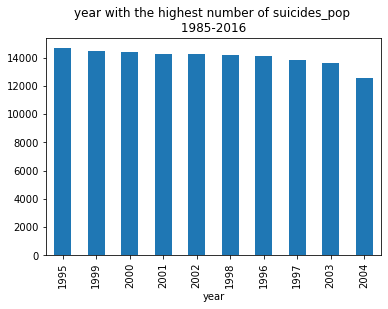

In [48]:
dfypp["suicides_pop"].head(10).plot.bar(title= "year with the highest number of suicides_pop \n 1985-2016 ")


## What country has the highest no of suicide_pop (Group by country and suicide_pop)

In [49]:
dfcsp= df.groupby("country").sum()
dfcsp.sort_values("suicides_pop", ascending=False , 
inplace = True)
dfcsp.head(10)

,year,suicides_no,population,suicides_pop,GDP_per_capital
country,,,,,
Russian Federation,648648,1209742,3690802620,11305.13,2112096
Lithuania,525420,28039,68085210,10588.88,2431504
Hungary,621060,73891,248644256,10156.07,2904716
Kazakhstan,624780,101546,377513869,9519.52,1662684
Republic of Korea,744000,261730,1354944936,9350.45,5506068
Austria,764160,50073,243853094,9076.23,13088000
Ukraine,672192,319950,1286469184,8931.66,627492
Japan,744000,806902,3681024844,8025.23,13539888
Finland,696348,33677,141925658,7924.11,12342960


<AxesSubplot:title={'center':'year with the highest number of suicides_pop \n 1985-2016 '}, xlabel='country'>

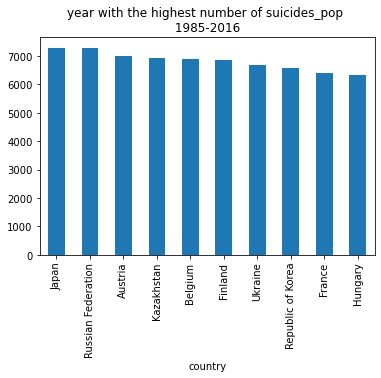

In [49]:
dfcsp["suicides_pop"].head(10).plot.bar(title= "year with the highest number of suicides_pop \n 1985-2016 ")

## What sex has the heighest number of suicides

In [50]:
dfss= df.groupby("sex").sum()
dfss.sort_values("suicides_no", ascending=False , 
inplace = True)
dfss.head(10)

,year,suicides_no,population,suicides_pop,GDP_per_capital
sex,,,,,
male,27837504,5188910,25049376579,281529.06,234612520
female,27837504,1559510,26272781857,75014.77,234612520


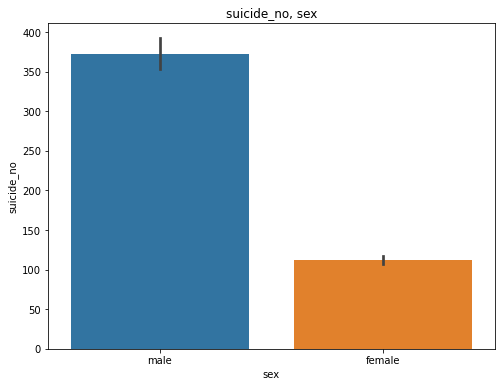

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(x = df["sex"], y = df["suicides_no"])
plt.xlabel = ("sex")
plt.ylabel("suicide_no")
plt.title ("suicide_no, sex")
plt.show()

## Corrolation between year, population, suicides_no, suicides_pop, year, GDP_per_capital

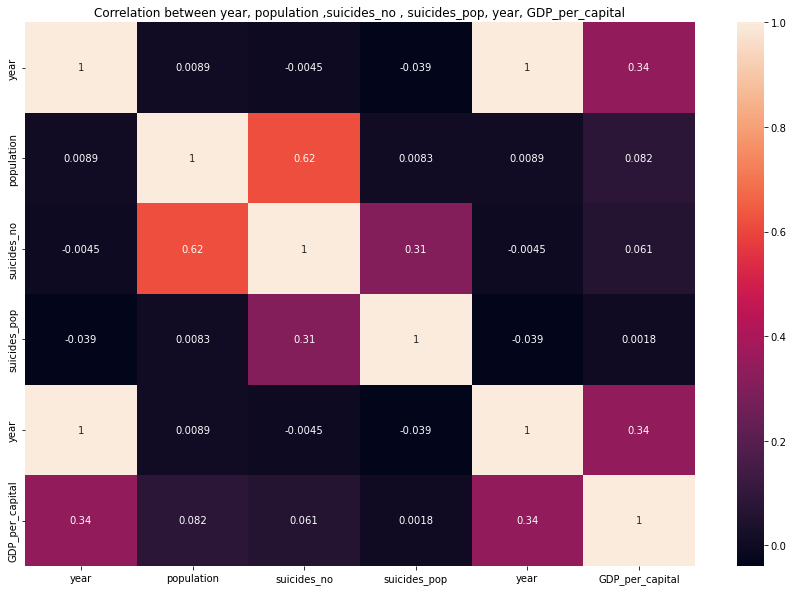

In [52]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.loc[:, ['year', 'population','suicides_no', 'suicides_pop','year','GDP_per_capital']].corr(), annot=True,)
plt.title('Correlation between year, population ,suicides_no , suicides_pop, year, GDP_per_capital')
plt.show()

## In which generation was  suicide number high

In [55]:
dfgs=df.groupby("generation").sum()
dfgs.sort_values("suicides_no", ascending=False , 
inplace = True)
dfgs.head(10)

,year,suicides_no,population,suicides_pop,GDP_per_capital
generation,,,,,
Boomers,9980242,2284498,13350511729,73563.05,79750168
Silent,12743414,1781744,9220331647,117217.55,111948324
Generation X,12813552,1532804,13472109292,67648.45,99996594
Millenials,11715748,623459,10649461202,31461.74,111331886
G.I. Generation,5466166,510009,2126202724,65708.86,28519510
Generation Z,2955886,15906,2503541842,944.18,37678558


<AxesSubplot:title={'center':'generation with the highest number of suicides_no \n 1985-2016 '}, xlabel='generation'>

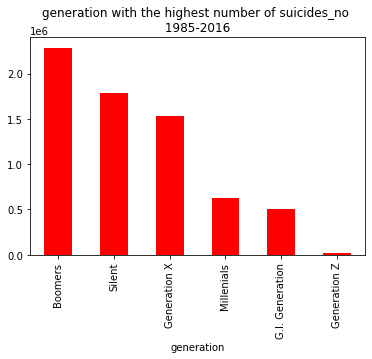

In [56]:
dfgs["suicides_no"].head(10).plot.bar(color= "red", title= "generation with the highest number of suicides_no \n 1985-2016 ")

## counties without suicide number (Group by coutry and suicides_no)

In [57]:
dfcs=df.groupby("country").sum()
dfcs.sort_values("suicides_no", ascending=True , 
inplace = True)
dfcs.head(10)

,year,suicides_no,population,suicides_pop,GDP_per_capital
country,,,,,
Dominica,23820,0,66400,0.00,17820
Saint Kitts and Nevis,71676,0,117300,0.00,198900
San Marino,72048,4,78825,145.62,1931892
Antigua and Barbuda,647832,11,1990228,179.14,3385212
Maldives,240612,20,2900246,164.08,610668
Macau,23928,27,346542,171.74,216972
Oman,72396,33,8987087,26.50,746664
Grenada,620556,38,2347286,661.00,1924916
Cabo Verde,24132,42,452179,133.84,49488


<AxesSubplot:title={'center':'sex with the highest number of suicides_no \n 1985-2016 '}, xlabel='country'>

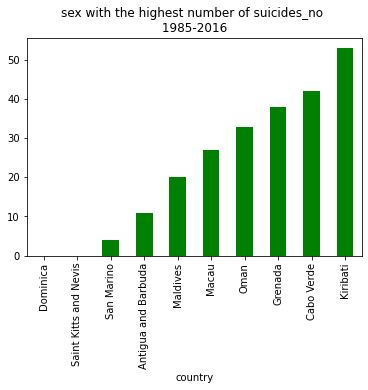

In [58]:
dfcs["suicides_no"].head(10).plot.bar(color = "Green",title= "sex with the highest number of suicides_no \n 1985-2016 ")


## Suicides_no by  Sex

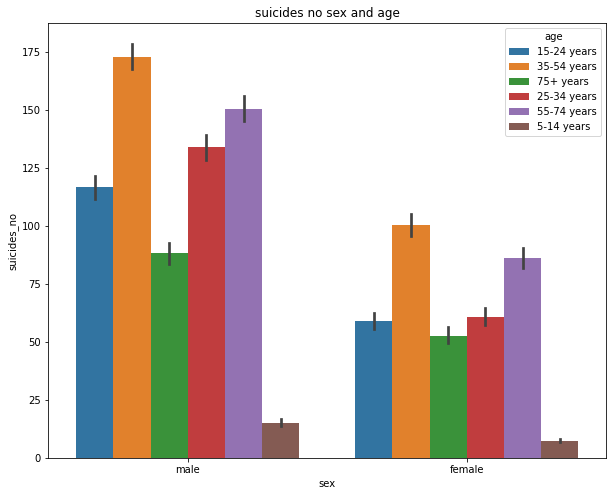

In [57]:
plt.figure(figsize=(10,8))
sns.barplot(x = df["sex"], y = df["suicides_no"], hue = df["age"])
plt.xlabel = ("sex")
plt.ylabel("suicides_no")
plt.title ("suicides no by sex ")
plt.show()

## GDP_per_capital by generation

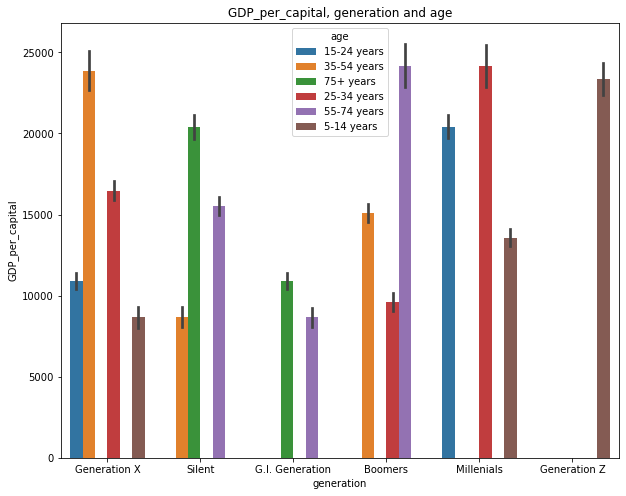

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(x = df["generation"], y = df["GDP_per_capital"], hue = df["age"])
plt.xlabel = ("generation")
plt.ylabel("GDP_per_capital")
plt.title ("GDP_per_capital, generation")
plt.show()

##  Suicides_no by  age

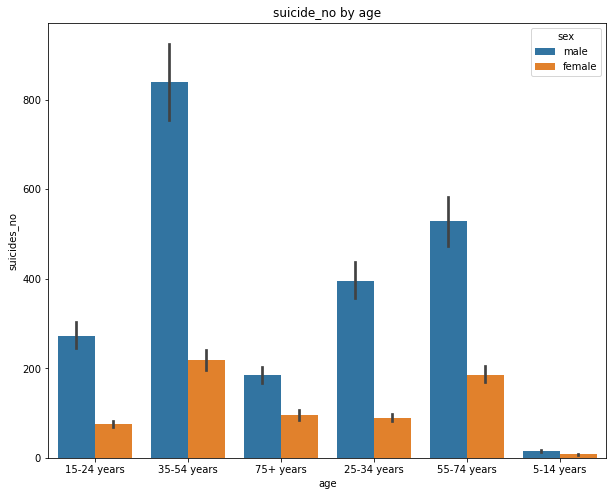

In [60]:
plt.figure(figsize=(10,8))
sns.barplot(x = df["age"], y = df["suicides_no"], hue = df["sex"])
plt.xlabel = ("Age")
plt.ylabel("suicides_no")
plt.title ("suicide_no by age")
plt.show()